# <center> Mô Hình SEIQHDRO </center>


## <u> Phân tích mô hình gốc </u>

Mô hình gốc trên website http://www.covid19-modelling.com/about được thể hiện qua flowchart và một hệ phương trình vi phân biểu diễn sự thay đổi của các biến số theo thời gian. Mô hình chia một khu vực dân cư thành 9 nhóm (compartment) là 9 biến số (state variables):
- S: những người chưa bị nhiễm
- E: những người đã tiếp xúc với virus nhưng chưa biết có nhiễm bệnh hay không (F1)
- Q: những người được đưa đi cách ly
- I: những người xác định đã nhiễm virus
- H: những người phải nhập viện
- C: những người bị nặng phải vào ICU
- D: những người tử vong
- R: những người khỏi bệnh được xuất viện
- O: những người được xác định negative với virus (bị nhẹ hoặc tiếp xúc với virus nhưng không lây)

Khu vực dân cư với 9 nhóm này được giả định khép kín, nghĩa là không có ai ra vào từ bên ngoài (kể cả sinh đẻ và chết vì các lý do khác). Ngoài các state variables các ký hiệu T và p là các tham số (parameters) của mô hình được xác định từ số liệu thực tế. $R_0$ là reproduction number (số người bị nhiễm từ một bệnh nhân), $\Delta R_0$ là biến đổi của $R_0$ sau 15 ngày. Hàm $f(t)$ là một hàm tuyến tính theo thời gian biểu diễn sự thay đổi của $R$, luôn giảm hoặc luôn tăng tùy thuộc vào lockdown được tăng cường hay nới lỏng. Giá trị của hàm $f$ ở một thời điểm $t$ được xác định bên ngoài hệ phương trình (exogenous).

Chín state variables biến đổi theo thời gian được biểu diễn bằng hệ 9 phương trình vi phân bậc nhất (trừ (1) và (2) là quadratic, còn lại là tuyến tính nên trên nguyên tắc có thể giải ra nghiệm tổng quát (analytical)):

$$\begin{align*} 
\frac{dS}{dt} & = - f(R_0, \Delta R_0, p_{cont}, p_{jrnl}, t) \left[ \frac{1}{T_{inf}} + \frac{1 - p_h}{T_{rec}} \right] I(t) S(t)\tag{1} \\
\frac{dE}{dt} & = f(R_0, \Delta R_0, p_{cont}, p_{jrnl}, t) \left[ \frac{1}{T_{inf}} + \frac{1 - p_h}{T_{rec}} \right] I(t) S(t) - \frac{1}{T_{inc}} E(t)\tag{2} \\
\frac{dI}{dt} & = \frac{1}{T_{inc}} E(t) - \left[ \frac{p_h}{T_{inf}} + \frac{1 - p_h}{T_{rec}}\right] I(t)\tag{3} \\
\frac{dQ}{dt} & = p_{quar} \frac{E}{T_{quar}} - (p_{quar\_hosp} + p_{cross\_cont}) * \frac{Q}{T_{quar\_hosp}}\tag{4} \\
\frac{dH}{dt} & = p_h \frac{I(t)}{T_{inf}} - (1 - p_c) \frac{H(t)}{T_{hsp}} - p_c \frac{H(t)}{T_{crt}} - \frac{p_h}{T_{rec}} H(t) + (p_{quar\_hosp} + p_{cross\_cont}) \frac{Q}{T_{quar\_hosp}}\tag{5} \\
\frac{dC}{dt} & = \frac{p_c}{T_{crt}} H(t) - \frac{C(t)}{T_{icu} + T_{crt}}\tag{6} \\
\frac{dD}{dt} & = \frac{p_f C(t)}{T_{icu} + T_{crt}}\tag{7} \\
\frac{dR}{dt} & = (1 - p_c) \frac{H(t)}{T_{hsp}} + (1 - p_f) \frac{C(t)}{T_{icu}}\tag{8} \\
\frac{dO}{dt} & = \frac{1 - p_h}{T_{rec}} I(t) + \frac{p_h}{T_{rec}} H(t)\tag{9} 
\end{align*}$$




Trên flowchart các compartment là các box được nối với nhau bằng các mũi tên một chiều biểu diễn sự dịch chuyển (flow) một số dân cư từ nhóm này sang nhóm khác trong quá trình dịch bệnh xảy ra. Để tiện theo dõi mỗi flow sẽ được đánh dấu bằng một chữ cái như dưới đây, ví dụ flow (a) là những người từ nhóm những chưa nhiễm bệnh (S) chuyển sang nhóm bị tiếp xúc với virus (E):


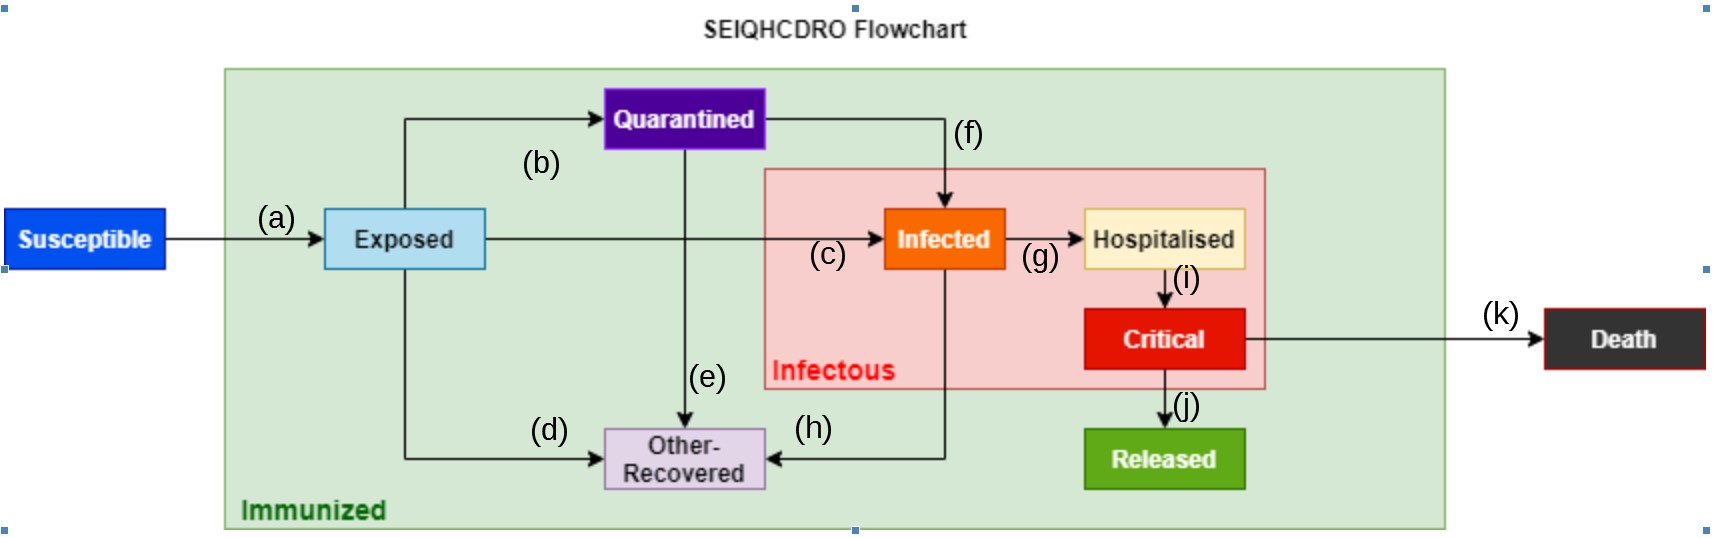





Vì mỗi flow phải xuất phát từ một nhóm và nhập vào một nhóm khác nên một flow phải xuất hiện 2 lần ở 2 phương trình khác nhau và có dấu trái nhau, dấu (-) cho mũi tên đi ra, (+) cho mũi tên đi vào. Dựa vào flowchart hệ phương trình có thể được viết tắt với các flow như sau:


$\begin{align*} 
\frac{dS}{dt} & = -(a)\tag{1} \\
\frac{dE}{dt} & = (a) - (b) - (c) -(d)\tag{2} \\
\frac{dI}{dt} & = (c) + (f) - (g) - (h)\tag{3} \\
\frac{dQ}{dt} & = (b) - (e) - (f)\tag{4} \\
\frac{dH}{dt} & = (g) - (i)\tag{5} \\
\frac{dC}{dt} & = (i) - (j) - (k)\tag{6} \\
\frac{dD}{dt} & = (k) \tag{7} \\
\frac{dR}{dt} & = (j)\tag{8} \\
\frac{dO}{dt} & = (d) + (e) + (h)\tag{9} 
\end{align*}$

So sánh các ký hiệu flow bằng chữ cái và hệ phương trình gốc, từng flow có thể được xác định dựa trên nguyên tắc nói trên (xuất hiện 2 lần ở 2 phương trình). Ví dụ từ phương trình (1) và (2) có thể xác định được (a):

$(a) = f(R_0, \Delta R_0, p_{cont}, p_{jrnl}, t) \left[ \frac{1}{T_{inf}} + \frac{1 - p_h}{T_{rec}} \right] I(t) S(t)$

Hay từ (2) và (3) xác định được (c):

$(c) = \frac{1}{T_{inc}} E(t)$


Tuy nhiên không phải tất cả các flow (trên flowchart) có thể xác định được bằng các này. Ví dụ phương trình (4) suy ra $(b) = p_{quar} \frac{E}{T_{quar}}$, nhưng biểu thức này không xuất hiện trong phương trình (2). Điều này chỉ có thể giải thích là hoặc flowchart không chính xác hoặc phương trình (2) không đầy đủ. Sau đây là tất cả các flow có thể xác định được chính xác dựa vào flowchart và hệ phương trình nguyên thủy trên website:

$\begin{align*} 
(a) & = f(R_0, \Delta R_0, p_{cont}, p_{jrnl}, t) \left[ \frac{1}{T_{inf}} + \frac{1 - p_h}{T_{rec}} \right] I(t) S(t) \\
(b) & =  \\ %p_{quar} \frac{E}{T_{quar}}
(c) & = \frac{1}{T_{inc}} E(t) \\
(d) & =  \\
(e) & =  \\
(f) & =  \\ %(p_{quar\_hosp} + p_{cross\_cont}) * \frac{Q}{T_{quar\_hosp}}
(g) & = \frac{p_h}{T_{inf}} I(t) \\
(h) & = \frac{1 - p_h}{T_{rec}}I(t) \\
(i) & = \frac{p_c}{T_{crt}} H(t) \\
(j) & = (1 - p_f) \frac{C(t)}{T_{icu}} \\
(k) & = \frac{p_f C(t)}{T_{icu} + T_{crt}}
\end{align*}$


## <u> Mô hình sửa đổi </u>



Để hệ phương trình và flowchart phù hợp với nhau một số thay đổi được đề xuất dưới đây (mầu đỏ):

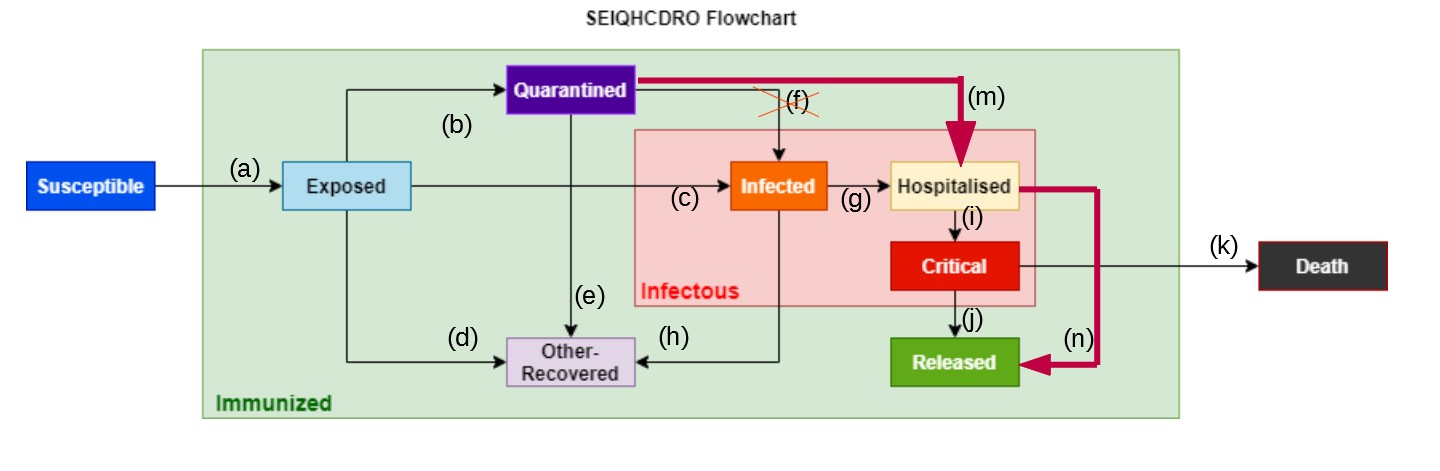

$\begin{align*} 
\frac{dS}{dt} &= - f(R_0, \Delta R_0, p_{cont}, p_{jrnl}, t) \left[ \frac{1}{T_{inf}} + \frac{1 - p_h}{T_{rec}} \right] I(t) S(t) = -(a) \\
\frac{dE}{dt} &= f(R_0, \Delta R_0, p_{cont}, p_{jrnl}, t) \left[ \frac{1}{T_{inf}} + \frac{1 - p_h}{T_{rec}} \right] I(t) S(t) - \frac{1}{T_{inc}} E(t) = (a) - [(b) + (c) + (d)] \\
\frac{dI}{dt} &= \color{red}{p_{inf}} \frac{E(t)}{T_{inc}} - \left[ \frac{p_h}{T_{inf}} + \frac{1 - p_h}{T_{rec}}\right] I(t) = (c) - (g) - (h)\\
\frac{dQ}{dt} &=  p_{qua} \frac{E(t)}{T_{\color{red}{inc}}} - \color{red}{p_{rec} \frac{Q(t)}{T_{rec}}} - (p_{quar\_hosp} + p_{cross\_cont}) \frac{Q(t)}{T_{quar\_hosp}} = (b) - (e) -(m) \\
\frac{dH}{dt} &= p_h \frac{I(t)}{T_{inf}} + (p_{quar\_hosp} + p_{cross\_cont}) \frac{Q(t)}{T_{quar\_hosp}} - (1 - p_c) \frac{H(t)}{T_{hsp}} - p_c \frac{H(t)}{T_{crt}} = (g) + (m) - (n) - (i) \\
\frac{dC}{dt} &= \frac{p_c}{T_{crt}} H(t) - \frac{C(t)}{T_{icu} + T_{crt}} = (i) - [(j) + (k)] \\
\frac{dD}{dt} &= \frac{p_f C(t)}{T_{icu} + T_{crt}} = (k) \\
\frac{dR}{dt} &= (1 - p_c) \frac{H(t)}{T_{hsp}} + (1 - p_f) \frac{C(t)}{T_{icu}+ \color{red}{T_{crt}}} = (j) + (n) \\
\frac{dO}{dt} &= \frac{1 - p_h}{T_{rec}} I(t) + \color{red}{p_{rec} \frac{Q(t)}{T_{rec}}} + \color{red}{(1 - p_{quar} - p_{inf})}\frac{E(t)}{T_{inc}} = (h) + (e) + (d)
\end{align*}$

*Trong đó:*

$\begin{align*} 
(a) & = f(R_0, \Delta R_0, p_{cont}, p_{jrnl}, t) \left[ \frac{1}{T_{inf}} + \frac{1 - p_h}{T_{rec}} \right] I(t) S(t) \\
    (b) & = p_{quar} \frac{E}{T_{\color{red}{inc}}} \\
(c) & = \color{red}{p_{inf}} \frac{E(t)}{T_{inc}} \\
(d) & = \color{red}{(1 - p_{quar} - p_{inf})}\frac{E(t)}{T_{inc}} \\
(e) & =  \color{red}{p_{rec} \frac{Q(t)}{T_{rec}}}\\
(f) & \space \color{red}{removed} \\
(g) & = \frac{p_h}{T_{inf}} I(t) \\
(h) & = \frac{1 - p_h}{T_{rec}}I(t) \\
(i) & = \frac{p_c}{T_{crt}} H(t) \\
(j) & = (1 - p_f) \frac{C(t)}{T_{icu} + \color{red}{T_{crt}}} \\
(k) & = \frac{p_f C(t)}{T_{icu} + T_{crt}}\\
(m) & = (p_{quar\_hosp} + p_{cross\_cont}) * \frac{Q}{T_{quar\_hosp}} \\
(n) & = \color{red}{(1 - p_c)\frac{H(t)}{T_{hsp}}}
\end{align*}$




Sửa đổi cuối cùng cho mô hình là thêm vào nhóm V của những người đã được miễn dịch thông qua chích ngừa vaccine hoặc đã nhiễm và đã khỏi. Trên thực tế đây là gộp của nhóm O và R cộng với flow (v) từ nhóm S. Do đó phương trình vi phân thứ 10 là:

$$\begin{equation}
\frac{dV}{dt} = \frac{p_v}{T_{vac}} S(t)\tag{10} = (v) \color{Tan}{ + [(d) + (e) +(h) +(j) +(n)]}
\end{equation}$$


Flowchart sửa đổi:

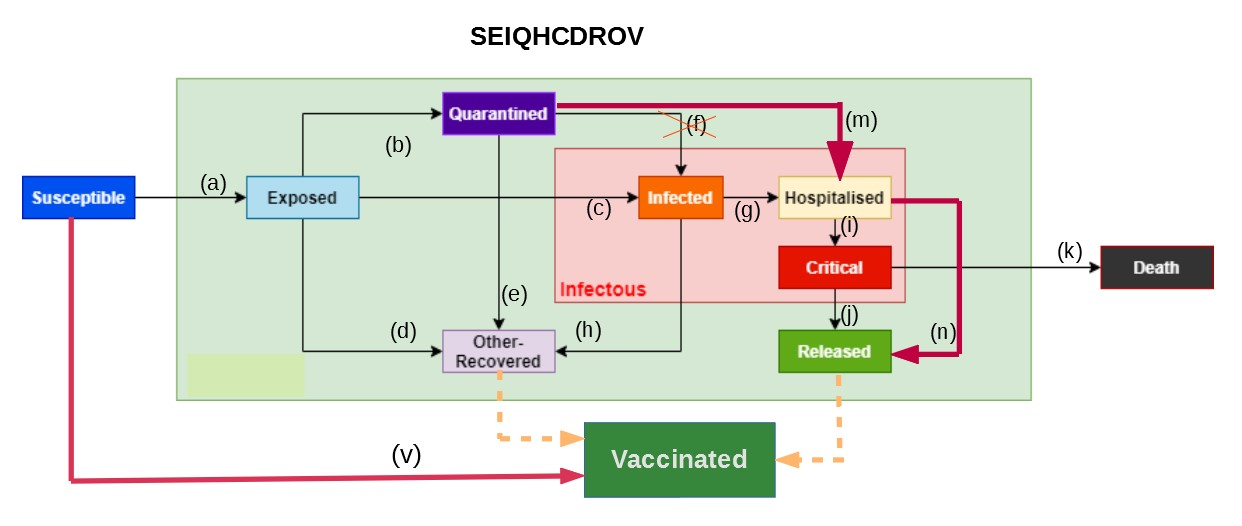


In [1]:
!jt -t oceans16 -tf merriserif -tfs 14 -nf ptsans -nfs 14

'jt' is not recognized as an internal or external command,
operable program or batch file.
